# Stackoverflow survey 2018 


## Overview

<p>As a newcomer to the Data Science field I'm interested in learning about potential obstacles. For that I will be using data collected from Stack Overflow annual developer survey.</p>

<ol>
    <li> How many people come to the field being 45 and older?</li>
    <li> What is the most popular job titles within newcomers?</li>
    <li> Who has bigger starting salary newcomers under 25 or over 45?</li></ol>



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

### Data Understanding

In [43]:
# Load file with survey results
df_18 = pd.read_csv('./survey_results_public_18.csv', low_memory=False)
df_18.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [44]:
print("Total number of participants in Stack OverFlow 2018 Annual Survey is:", df_18.shape[0])

Total number of participants in Stack OverFlow 2018 Annual Survey is: 98855


In [45]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [46]:
df_18.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [47]:
def plot_feature(feature, n_top):
    """
    Creates a plot assosiated with chosen feature
    
    -INPUT - feature - column name, n_top - number of top results, title - title of the plot
    -OUTPUT - None
    """
    count_vals = df_18[feature].value_counts()
    (count_vals[:n_top]/df_18.shape[0]).plot(kind="bar", figsize=(8,6));
    plt.title("{}".format(feature))

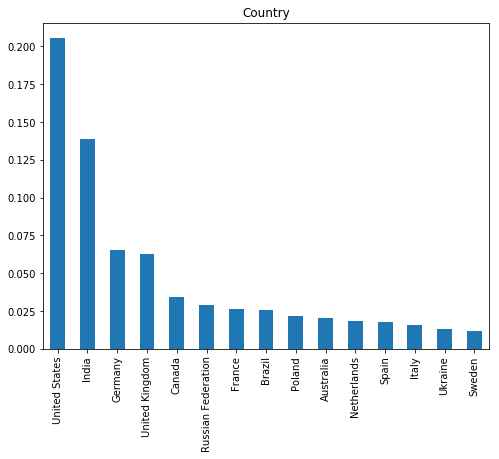

In [48]:
# Percentage by country
plot_feature('Country', 15)

Majority of the participants are from English-speaking countries with USA ia the lead.  

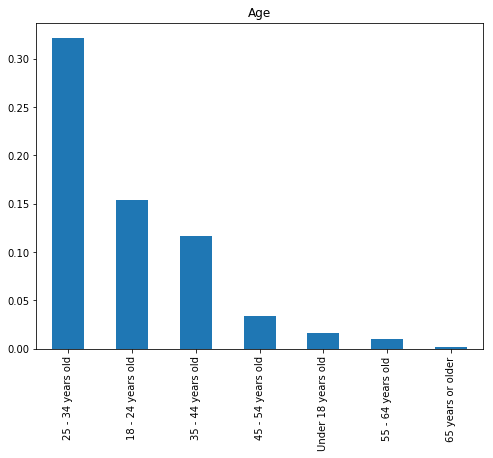

In [49]:
#Percentage by age group
plot_feature('Age', 10)

Almost 30% of all the participants are of age 25 to 34 years old and close to 60% are younger than I.  

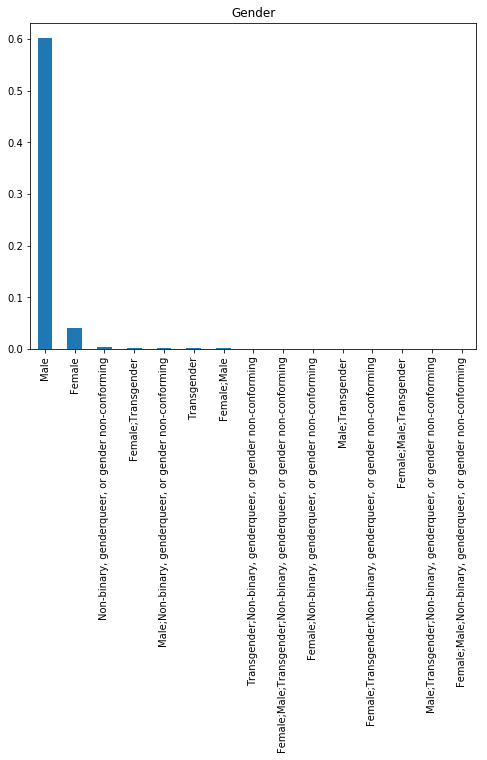

In [50]:
plot_feature('Gender', 15)

In [51]:
df_18['Gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

From Gender plot I see that numbers for gender types beyond Males and Females are not very significant. I see NaN as a possible value. To have a better understanding of the proportion of females participated in survey I will drop NaN values and plot total counts for 'Male' and 'Female' only.

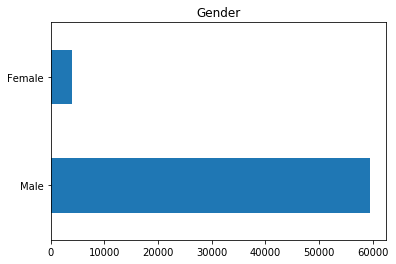

In [52]:
df_18.Gender.dropna().value_counts()[:2].plot(kind='barh', title = 'Gender');

Female counts are very low and for that reason I will not make analysis based on my gender.

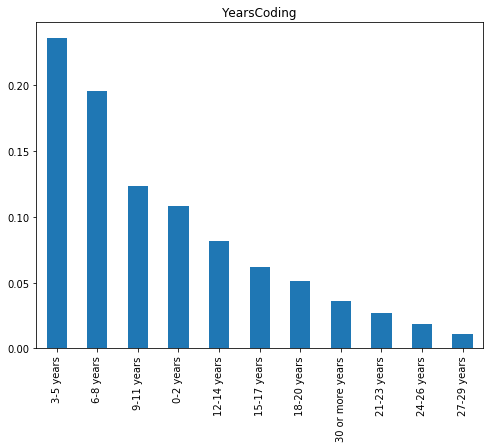

In [53]:
plot_feature('YearsCoding', 15)

Almost 100,000 people around the world (98,855 to be precise) participated in this survey. About 5% of them are between 45–54 years old and about 15% are between 18–24 years old. I think it makes sense to compare those two groups when we are thinking about starting fresh.

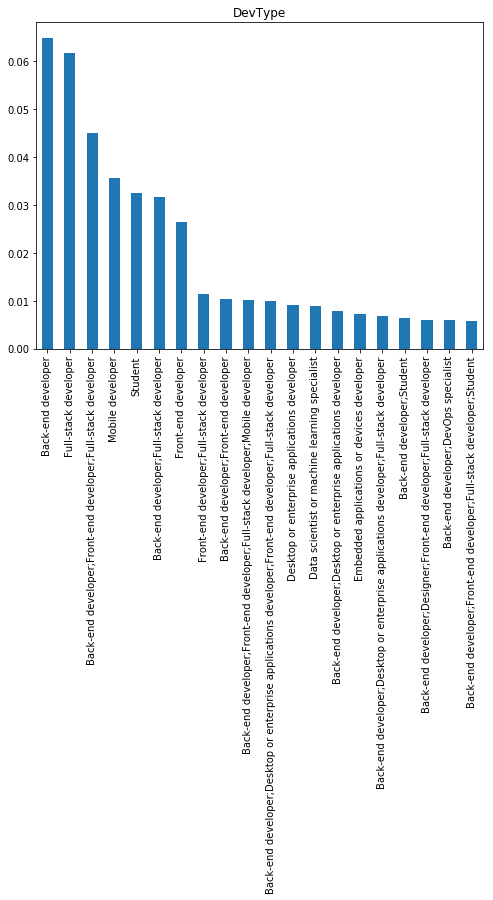

In [54]:
plot_feature('DevType', 20)

To answer my questions I need to take care of DevType values. 

In [55]:

df_18['DevType'].unique()

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'],
      dtype=object)

Developer Types are multi choices answers. I need to clean that data. Following code idea was borrowed from here: https://www.kaggle.com/gpreda/stack-overflow-2018-developer-survey-extensive-eda The NaN values were dropped so we can separate multi choice answers to single Developer Type.

In [56]:
# Create new data frame containing single description for Developer Type
df_jobs = pd.DataFrame.from_records(df_18['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()

In [57]:
df_jobs.index

Index(['Back-end developer', 'Full-stack developer', 'Front-end developer',
       'Mobile developer', 'Desktop or enterprise applications developer',
       'Student', 'Database administrator', 'Designer', 'System administrator',
       'DevOps specialist', 'Data or business analyst',
       'Data scientist or machine learning specialist', 'QA or test developer',
       'Engineering manager', 'Embedded applications or devices developer',
       'Game or graphics developer', 'Product manager',
       'Educator or academic researcher', 'C-suite executive (CEO, CTO, etc.)',
       'Marketing or sales professional'],
      dtype='object')

### How many people come to the field being 45 and older?

To answer this question I decided to create a new DataFrame with less data in it.

In [58]:
# New data set with columns that I potentially will need
df_less = df_18[['Gender', 'Country', 'Employment', 'Student', 'Age', 'FormalEducation', 
                'ConvertedSalary', 'DevType', 'YearsCoding', 'JobSatisfaction']]
df_less.head()

,Gender,Country,Employment,Student,Age,FormalEducation,ConvertedSalary,DevType,YearsCoding,JobSatisfaction
0,Male,Kenya,Employed part-time,No,25 - 34 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Full-stack developer,3-5 years,Extremely satisfied
1,Male,United Kingdom,Employed full-time,No,35 - 44 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0,Database administrator;DevOps specialist;Full-...,30 or more years,Moderately dissatisfied
2,NaN,United States,Employed full-time,No,NaN,Associate degree,NaN,Engineering manager;Full-stack developer,24-26 years,Moderately satisfied
3,Male,United States,Employed full-time,No,35 - 44 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Full-stack developer,18-20 years,Neither satisfied nor dissatisfied
4,Male,South Africa,Employed full-time,"Yes, part-time",18 - 24 years old,Some college/university study without earning ...,21426.0,Data or business analyst;Desktop or enterprise...,6-8 years,Slightly satisfied


In [59]:
# print newcomers percentage within the age group for 25-34 and 35-44 

print(df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '25 - 34 years old')].shape[0]/df_less.shape[0])
print(df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '35 - 44 years old')].shape[0]/df_less.shape[0])

0.019816903545597085
0.002407566638005159


Next step is to have two separate sets for age group 18-24 and 45-54 with 0 to 2 years of coding expirience

In [60]:
# Two new sets for newcomers in the age groups of 18-24 and 45-54 
newcomers_45 = df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '45 - 54 years old')]
newcomers_24 = df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '18 - 24 years old')]
print('Total number of newcomers in age group 45-54 years old:',newcomers_45.shape[0])

Total number of newcomers in age group 45-54 years old: 48


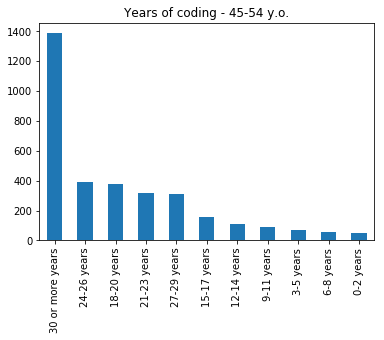

In [61]:
df_less[df_less['Age'] == '45 - 54 years old']['YearsCoding'].value_counts().plot(kind='bar', title="Years of coding - 45-54 y.o.");

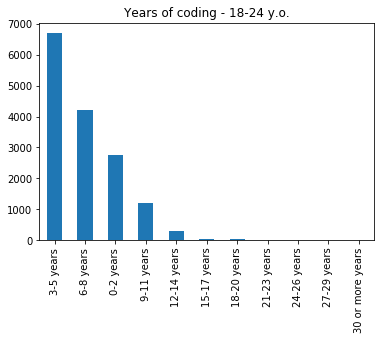

In [62]:
df_less[df_less['Age'] == '18 - 24 years old']['YearsCoding'].value_counts().plot(kind='bar', title="Years of coding - 18-24 y.o.");

Only 48 people of my age have between 0 to 2 years of coding. Not a lot, but still exciting!

### What is the most popular job titles within newcomers?

To find the most popular jobs within chosen age groups I will concate  job lists for those groups in one DataFrame and plot results.

In [63]:
jobs_45 = pd.DataFrame.from_records(newcomers_45['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()
jobs_24 = pd.DataFrame.from_records(newcomers_24['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()

In [64]:
jobs_45_pct = jobs_45/sum(jobs_45.values)*100
jobs_24_pct = jobs_24/sum(jobs_24.values)*100
jobs_pct = pd.concat([jobs_45_pct, jobs_24_pct], axis=1, sort=True)
jobs_pct.columns = ['Age 45-54', 'Age 18-24']
jobs_pct['Developer_type'] = jobs_pct.index
jobs_pct.reset_index(drop=True)
jobs_pct



,Age 45-54,Age 18-24,Developer_type
Back-end developer,13.483146,17.483133,Back-end developer
"C-suite executive (CEO, CTO, etc.)",2.247191,0.542681,"C-suite executive (CEO, CTO, etc.)"
Data or business analyst,5.617978,2.508067,Data or business analyst
Data scientist or machine learning specialist,3.370787,2.346729,Data scientist or machine learning specialist
Database administrator,2.247191,3.622763,Database administrator
Designer,7.865169,5.778821,Designer
Desktop or enterprise applications developer,3.370787,3.549428,Desktop or enterprise applications developer
DevOps specialist,2.247191,1.144031,DevOps specialist
Educator or academic researcher,4.494382,0.894691,Educator or academic researcher
Embedded applications or devices developer,2.247191,1.070695,Embedded applications or devices developer


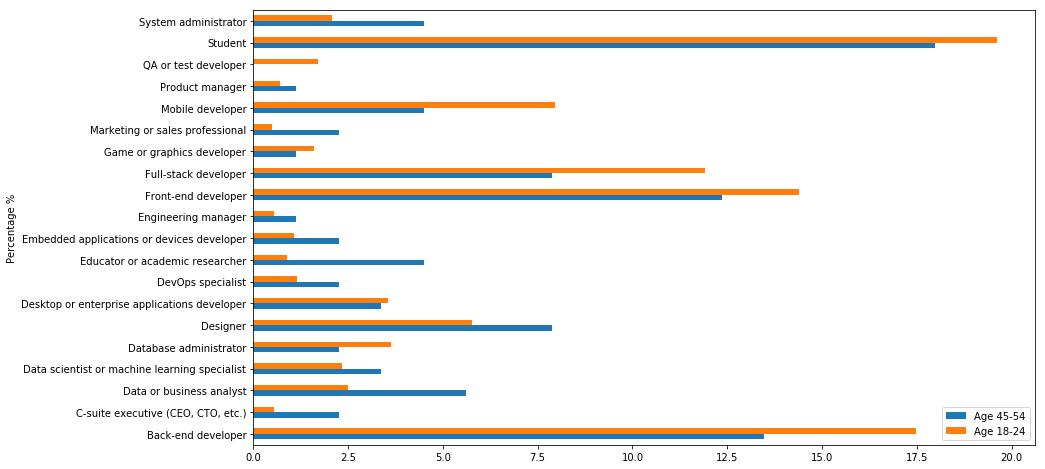

In [65]:
jobs_pct.plot(x='Developer_type', y = ['Age 45-54', 'Age 18-24'], kind='barh', figsize=(14,8))
plt.xlabel('')
plt.ylabel('Percentage %')
plt.show()

In [66]:
print("Age 18-24 \n\n",jobs_24_pct.head(5))
print("Age 45-54 \n\n",jobs_45_pct.head(5))

Age 18-24 

 Student                 19.624523
Back-end developer      17.483133
Front-end developer     14.403051
Full-stack developer    11.924318
Mobile developer         7.949545
dtype: float64
Age 45-54 

 Student                 17.977528
Back-end developer      13.483146
Front-end developer     12.359551
Designer                 7.865169
Full-stack developer     7.865169
dtype: float64


As we can see, about 20% of 18–24 y.o. and about 18% of 45–54 y.o. consider themselves a ‘Student’. (Never stop learning!) The most popular Developer Type/Job is ‘Back-end Developer’, which makes 17.5% and 13.5% in both groups with ‘Front-end developer’ (about 14% and and 12% respectively) following it. Both jobs are more popular within the younger age group.


#### What about Data Science?

Percentage wise we can see below that the Data Science field is more popular for people my age.

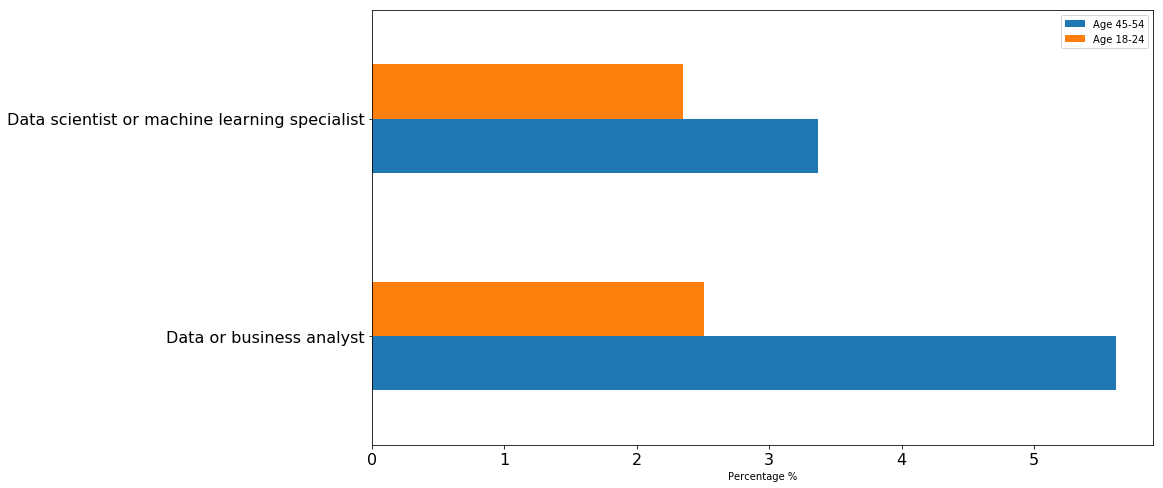

In [67]:
jobs_pct[jobs_pct['Developer_type'].str.contains('Data ')].plot(x='Developer_type', y = ['Age 45-54', 'Age 18-24'], 
                                                                kind='barh', figsize=(14,8), fontsize=16)
plt.xlabel('Percentage %')
plt.ylabel('')
plt.show()

### Who has bigger starting salary newcomers under 25 or over 45?

Let take a look at the salary distribution for 45-54 years old.

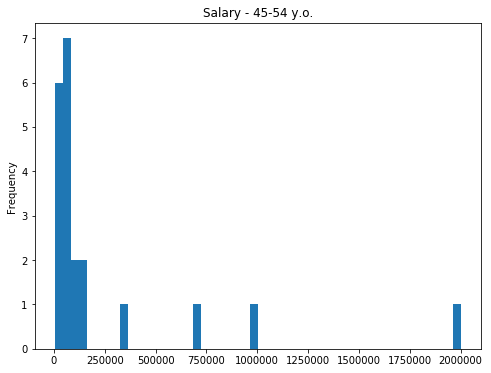

In [68]:
newcomers_45['ConvertedSalary'].plot(kind='hist', bins=50, title='Salary - 45-54 y.o.', figsize=(8,6));

Some people are very lucky to get more than 750,000 a year! We need to consider them as outliers. Below is a plot of Salary distribution with Salary limit to 400,000

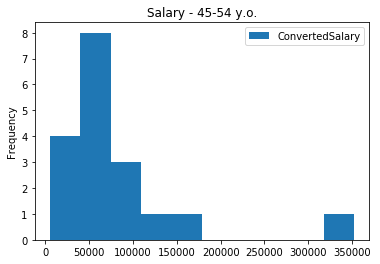

In [69]:
newcomers_45[newcomers_45['ConvertedSalary'] < 400000].plot(kind='hist', title='Salary - 45-54 y.o.');

To be fair I will limit Salary for 18-24 years old to the same number.

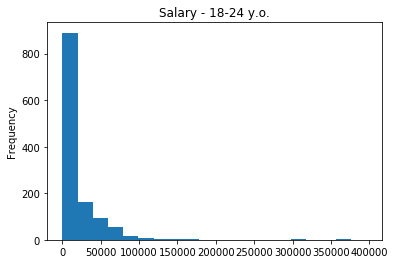

In [70]:
newcomers_24[newcomers_24['ConvertedSalary'] < 400000]['ConvertedSalary'].plot(kind='hist', bins=20, title='Salary - 18-24 y.o.');

Let's find out mean salary for both age groups:

In [71]:

print('Mean salary for newcomers 45 - 54 year old:',round(newcomers_45[newcomers_45['ConvertedSalary'] < 500000]['ConvertedSalary'].mean()))
print('Mean salary for newcomers 18 - 24 year old:',round(newcomers_24[newcomers_24['ConvertedSalary'] < 500000]['ConvertedSalary'].mean()))

Mean salary for newcomers 45 - 54 year old: 80357.0
Mean salary for newcomers 18 - 24 year old: 22237.0


Although the older age group may not have as much experience, their mean salary is significantly larger than that of the younger age group. This is likely in part to their overall greater experience in collaboration, and having a variety of work skills already under their belt.


### Conclusion

Although the older age group may not have as much experience, their mean salary is significantly larger than that of the younger age group. This is likely in part to their overall greater experience in collaboration, and having a variety of work skills already under their belt.
